# Live Coding Session 1
### Installation
#### Terminal
```bash
git clone https://github.com/libklein/mfms-ss21
cd mfms-ss21
pip install -r requirements.txt
jupyter notebook
```

#### PyCharm
```bash
Download git repo
Open project in pycharm
```

#### [Binder](https://github.com/libklein/mfms-ss21)

## Live Coding Session 1 - Agenda

#### NetworkX
* Concepts
* Working with graphs
* Handling Data

#### OSMnx
* Concepts
* Fetching geometry
* Generating street networks
* Routing

#### Implementation: diet aware routing

# NetworkX

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

* Provides classes that let us treat graphs as high-level python objects
* Implements many well-known algorithms on top of these
    * Shortest-path
    * Network flow
    * Clustering
    * ... and many more
* Visualization using matplotlib
* (Advanced) network analysis
* Tools for (de-)serialization

## NetworkX - Concepts

Graphs comprise:

* Graph object
* Nodes (arbitrary values/types)
* Edges (directed and undirected)
* Attributes (arbitrary data, associated with `graphs`, `nodes`, `edges`)

| Networkx Class | Type       | Self-loops allowed | Parallel edges allowed |
| :- | :-: | :-: | :-: |
| `Graph()`          | undirected | Yes                | No                     |
| `DiGraph()`        | directed   | Yes                | No                     |
| `MultiGraph()`     | undirected | Yes                | Yes                    |
| `MultiDiGraph()`   | directed   | Yes                | Yes                    |

*Ordered* versions of these exist.

## Working with graphs

In [6]:
import networkx as nx

### Creation

In [7]:
# Create an empty graph
G = nx.Graph()
display(G)

#### Nodes

In [8]:
# Add some nodes
G.add_node('Max')
# Add nodes from iterable
G.add_nodes_from(['Gerhard', 'Patrick', 'Marianne'])
# Can be any hashable (https://docs.python.org/3/glossary.html#term-hashable) type
mfms_team = frozenset(['Patrick', 'Gerhard', 'Max', 'Marianne'])
G.add_node(mfms_team)

['Max', 'Gerhard', 'Patrick', 'Marianne', frozenset({'Marianne', 'Patrick', 'Gerhard', 'Max'})]


#### Edges

In [12]:
G.add_edge('Patrick', 'Max')
G.add_edges_from([('Max', 'Marianne'), ('Gerhard', 'Marianne'), ('Max', 'Gerhard')])

G.add_edge('A', 'Patrick')
print(G.edges)
print(G.nodes)

[('Max', 'Patrick'), ('Max', 'Marianne'), ('Max', 'Gerhard'), ('Gerhard', 'Marianne'), ('Patrick', 'A')]
['Max', 'Gerhard', 'Patrick', 'Marianne', frozenset({'Marianne', 'Patrick', 'Gerhard', 'Max'}), 'A']


In [ ]:
# Be careful: Non-existent nodes are added automatically
G.add_edge(1, 2)
G.remove_node(1)
print(G.nodes, G.edges)
G.remove_node(2)
G.remove_node(mfms_team)
print(G.nodes, G.edges)

## Working with graphs

### Displaying graphs

Info gives a nice overview on the graph:

In [13]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 5
Average degree:   1.6667


For small graphs, drawing works well too:

In [1]:
nx.draw(G, with_labels=True)

NameError: name 'nx' is not defined

### Accessing elements

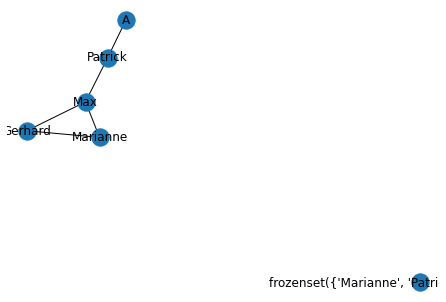

In [15]:
nx.draw(G, with_labels=True)

In [16]:
# G.nodes, G.edges, G.adj and G.degree
print('Nodes of G:', G.nodes) # "View" of nodes
print('Edges of G:', G.edges) # "View" of edges
print('Adjacency lists of nodes: ', G.adj)
print('Neighborhood', list(G.neighbors('Patrick')), 'vs Adjacency', G.adj['Patrick'])
print('Degrees of nodes in G: ', G.degree, '<=>', [(node, len(neighbors)) for node, neighbors in G.adj.items()])

Nodes of G: ['Max', 'Gerhard', 'Patrick', 'Marianne', frozenset({'Marianne', 'Patrick', 'Gerhard', 'Max'}), 'A']
Edges of G: [('Max', 'Patrick'), ('Max', 'Marianne'), ('Max', 'Gerhard'), ('Gerhard', 'Marianne'), ('Patrick', 'A')]
Adjacency lists of nodes:  {'Max': {'Patrick': {}, 'Marianne': {}, 'Gerhard': {}}, 'Gerhard': {'Marianne': {}, 'Max': {}}, 'Patrick': {'Max': {}, 'A': {}}, 'Marianne': {'Max': {}, 'Gerhard': {}}, frozenset({'Marianne', 'Patrick', 'Gerhard', 'Max'}): {}, 'A': {'Patrick': {}}}
Neighborhood ['Max', 'A'] vs Adjacency {'Max': {}, 'A': {}}
Degrees of nodes in G:  [('Max', 3), ('Gerhard', 2), ('Patrick', 2), ('Marianne', 2), (frozenset({'Marianne', 'Patrick', 'Gerhard', 'Max'}), 0), ('A', 1)] <=> [('Max', 3), ('Gerhard', 2), ('Patrick', 2), ('Marianne', 2), (frozenset({'Marianne', 'Patrick', 'Gerhard', 'Max'}), 0), ('A', 1)]


In [17]:
# Look like lists, but behave like dictionaries
print(G.nodes['Patrick'])
print(G.edges['Patrick', 'Max'])

{}
{}


In [ ]:
# For example, integer indices wont work. Unless we've added an appropiate edge.
print(G.nodes[0])

## Handling data

We can store data on nodes and edges by setting ***attributes***.

In [20]:
# Store role=Lecturer on node Max
G.nodes['Max']['role'] = 'Lecturer'
print(G.nodes['Max'])

# Add value 'supervises' to key 'relationship' of edge dict.
G.edges['Max', 'Patrick']['relationship'] = 'supervises'
G.edges['Max', 'Patrick']['something'] = 5
print(G.edges['Max', 'Patrick'])

{'role': 'Lecturer'}
{'relationship': 'supervises', 'something': 5}


=> We can think of ***Attributes*** as dictionaries kept along nodes and edges.

## DiGraphs

Behave just like normal `Graph` objects, except that edges are directed:

In [7]:
G = nx.DiGraph()
G.add_nodes_from(['Max', 'Patrick'])
G.add_edge('Max', 'Patrick', relationship='supervises')
print(G.edges['Max', 'Patrick'])
# We get a KeyError here as this edge does not exist
print(G.edges['Patrick', 'Max'])

{'relationship': 'supervises'}


KeyError: 'Max'